#Aplicando Modelos de ML

##Librerías

Importamos las Librerías necesiarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

##Conjunto de Datos 1

Cargamos y visualizamos el *Conjunto de Datos 1*, años de experiencia de un trabajador frente al salario que recibe.

In [ ]:
df = pd.read_csv('/content/ConjuntoDeDatos1.csv')
df.head()

,Experiencia,Salario
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Observamos que no contenga valores nulos o faltantes

In [ ]:
df.isna().sum()

Experiencia    0
Salario        0
dtype: int64

Definimos la variable dependiente *X* y la variable objetivo *y*

In [ ]:
X, y = df[['Experiencia']], df[['Salario']]

###Regresión Lineal

Determinamos el modelo de aprendizaje de máquina de **regresión lineal** que mejor se adecue a los datos

In [ ]:
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

Realizamos la predicción con base en el modelo

In [ ]:
lin_pred = linreg.predict(X)

Creamos una visualización con la predicción y datos del modelo

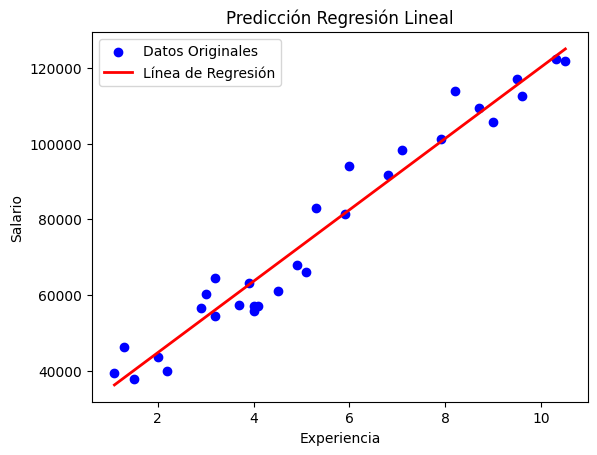

In [ ]:
plt.scatter(X, y, color='blue', label='Datos Originales')
plt.plot(X, lin_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Predicción de Regresión Lineal')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.legend()
plt.show()

###Árbol de Regresión

Construimos el modelo de aprendizaje de máquina utilizando un **árbol de regresion**

In [ ]:
treereg = DecisionTreeRegressor()
treereg.fit(X, y)

DecisionTreeRegressor()

Obtenemos la predicción del modelo

In [ ]:
tree_pred = treereg.predict(X)

Creamos la Visualización de las predicciones del modelo (Decision Tree Regressor)

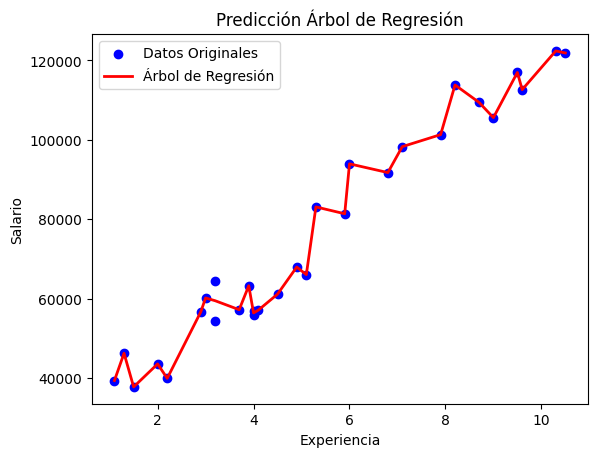

In [ ]:
plt.scatter(X, y, color='blue', label='Datos Originales')
plt.plot(X, tree_pred, color='red', linewidth=2, label='Árbol de Regresión')
plt.title('Predicción de Árbol de Regresión')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.legend()
plt.show()

###Bósques Aleatorios

Construímos un modelo utilizanfo el método de **Bósques aleatorios**

In [ ]:
ranfor = RandomForestRegressor(n_estimators=100, random_state=0)  # Puedes ajustar n_estimators según sea necesario
ranfor.fit(X, y)

<ipython-input-41-c13f84407060>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ranfor.fit(X, y)


RandomForestRegressor(random_state=0)

Obtenemos una predicción del modelo

In [ ]:
ran_pred = ranfor.predict(X)

Dibujamos la línea de predicción obtenida del modelo

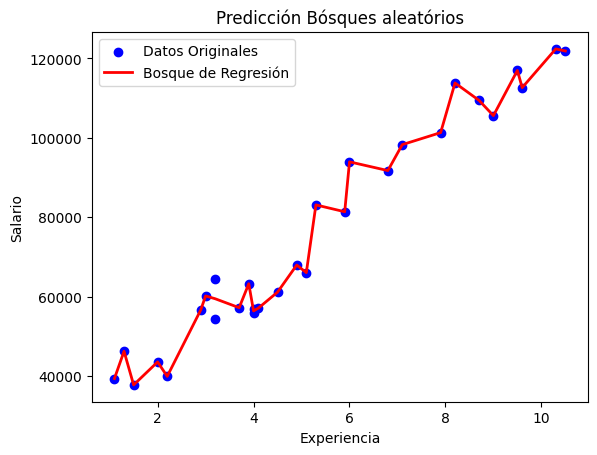

In [ ]:
plt.scatter(X, y, color='blue', label='Datos Originales')
plt.plot(X, tree_pred, color='red', linewidth=2, label='Bosque de Regresión')
plt.title('Predicción de Bósques aleatórios')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.legend()
plt.show()

##Conjunto de Datos 2

Cargamos y visualizamos el *Conjunto de Datos 2*, cantidad de procesamiento que requieren los módulos de un sistema computacional

In [ ]:
df = pd.read_csv('/content/ConjuntoDeDatos2.csv')
df.head()

,Procesadores,Aceleracion,Unnamed: 2
0,1,1,NaN
1,2,2,NaN
2,3,4,NaN
3,4,8,NaN
4,5,16,NaN


Observamos los valores nulos del conjunto

In [ ]:
df.isna().sum()

Procesadores     0
Aceleracion      0
Unnamed: 2      11
dtype: int64

Definimos las variables dependientes *X* y la variable independiente *y* excluyendo la última columna que contiene valores nulos en su totalidad

In [ ]:
X, y = df[['Procesadores']], df[['Aceleracion']]

###Regresión Polinómica

Aplicamos la transoformación polinómica a los datos para realizar la **Regresión Polinómica**

In [ ]:
grado = 3
poly_features = PolynomialFeatures(degree=grado)
X_poly = poly_features.fit_transform(X)

Creamos un modelo de Regresión Lineal ajustándolo a los nuevos datos

In [ ]:
linreg_poly = LinearRegression()
linreg_poly.fit(X_poly, y)

LinearRegression()

In [ ]:
pred_poly = linreg_poly.predict(X_poly)

Observamos la curva obtenida de la predicción del modelo

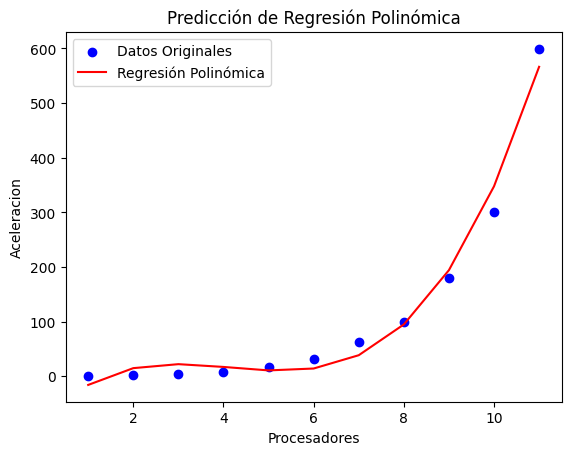

In [ ]:
plt.scatter(X, y, color='blue', label='Datos Originales')
plt.plot(X, pred_poly, color='red', label='Regresión Polinómica')
plt.title('Predicción de Regresión Polinómica')
plt.xlabel('Procesadores')
plt.ylabel('Aceleracion')
plt.legend()
plt.show()

###Máquinas de Soporte Vectorial

Contruimos un modelo utilizando regresión con **Máquinas de Soporte Vectorial**.

In [ ]:
svr = SVR(kernel='linear')
svr.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

Obtenemos la predicción del modelo

In [ ]:
pred_svr = svr.predict(X)

Observamos la línea de regresión otenida y comparamos los puntos obtenidos por la predicción y los datos originales

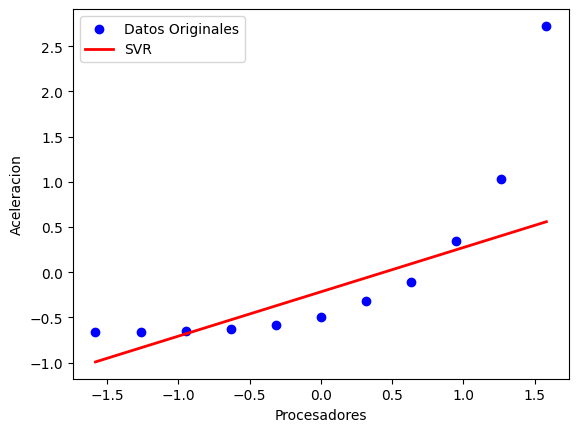

In [ ]:
plt.scatter(X, y, color='blue', label='Datos Originales')
plt.plot(X, pred_svr, color='red', linewidth=2, label='SVR')
plt.xlabel('Procesadores')
plt.ylabel('Aceleracion')
plt.legend()
plt.show()

##Conjunto de Datos 3

Cargamos el *Conjunto de Datos 3*, ganancia de diferentes empresas "startups" tecnologicas a partir de la inversión de tres rubros, las cuales se encuentran distribuídas en diferentes puntos de EEUU

In [ ]:
df = pd.read_csv('/content/ConjuntoDeDatos3.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Revisamos que el conjunto no contenga valores nulos

In [ ]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Declaramos el conjunto de variables independientes *X* y la variable dependiente *y*

In [ ]:
X, y = df.drop('Profit', axis=1), df.Profit

###Método de Eliminación Múltiple hacia Atrás

Dividimos el conjunto de datos en entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Aplicamos el preprocesamiento a los datos:
* Escalado estándar para variables numéricas
* Codificación One Hot para *State*

In [ ]:
num_features = ['R&D Spend', 'Administration', 'Marketing Spend']
cat_features = ['State']

In [ ]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(drop='first')

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

Creamos el pipeline de preprocesamiento y entrenamos el conjunto indicado

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [ ]:
X_train_p = pipeline.fit_transform(X_train)
X_test_p = pipeline.transform(X_test)

Implementamos la **Eliminación Múltiple hacia Atrás**

In [ ]:
def backward_elimination(X, y, significance_level=0.07):
    num_vars = X.shape[1]
    for i in range(0, num_vars):
        X = sm.add_constant(X)
        ols = sm.OLS(y, X).fit()
        max_pvalue = max(ols.pvalues)
        if max_pvalue > significance_level:
            removed_feat_i = ols.pvalues.argmax()
            X = np.delete(X, removed_feat_i, axis=1)
        else:
            break
    return X

Aplicamos la eliminación Múltiple al conjunto de entrenamiento

In [ ]:
X_train_selected = backward_elimination(X_train_p, y_train)

In [ ]:
selected_feat_i = np.where(X_train_selected.any(axis=0))[0]
selected_feat = [X_train.columns[i] for i in selected_feat_i]

Observamos las características seleccionadas

In [ ]:
selected_feat

['R&D Spend', 'Administration', 'Marketing Spend']

Dividimos el conjunto en datos de entrenamiento y prueba

In [ ]:
X_train_final, X_test_final = X_train_p[:, selected_feat_i], X_test_p[:, selected_feat_i]

Construimos el modelo de Regresión Lineal

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train_final, y_train)

LinearRegression()

Realizamos predicciones en el conjunto de prueba

In [ ]:
y_pred = linreg.predict(X_test_final)

Graficamos los resultados de la predicción

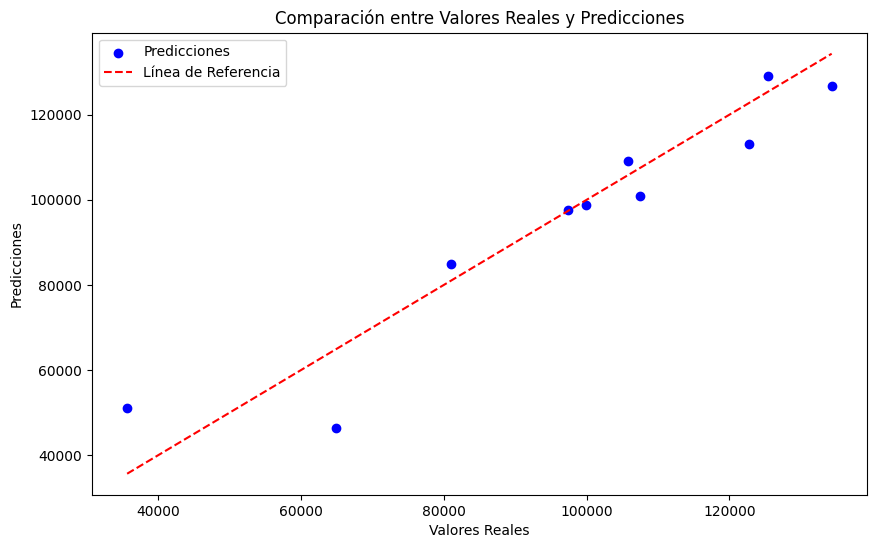

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de Referencia')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()